## Multimodal with Image, Audio Generation

In [2]:
import os
import json
from dotenv import load_dotenv
from openai import OpenAI
import gradio as gr

In [3]:
load_dotenv(override=True)

api_key= os.getenv('OPENAI_API_KEY')
base_url=os.getenv('OPENAI_BASE_URL')


if api_key and api_key.startswith('helix-') and len(api_key)>10:
    print("API key looks good so far")
else:
    print("There might be a problem with your API key? Please visit the troubleshooting notebook!")

openai = OpenAI(
    base_url=base_url,
    api_key=api_key
)

API key looks good so far


In [4]:
import base64
from io import BytesIO
from PIL import Image

In [11]:
def artist(city):
    image_response = openai.images.generate(
        model="FLUX.1-pro",
        prompt=f"An image representing a vacation in {city}, showing tourist spots and everything unique about {city}, in a vibrant pop-art style",
        size="1024x1024",
        n=1,
        response_format="b64_json",
    )
    image_base64 = image_response.data[0].b64_json
    image_data = base64.b64decode(image_base64)
    return Image.open(BytesIO(image_data))

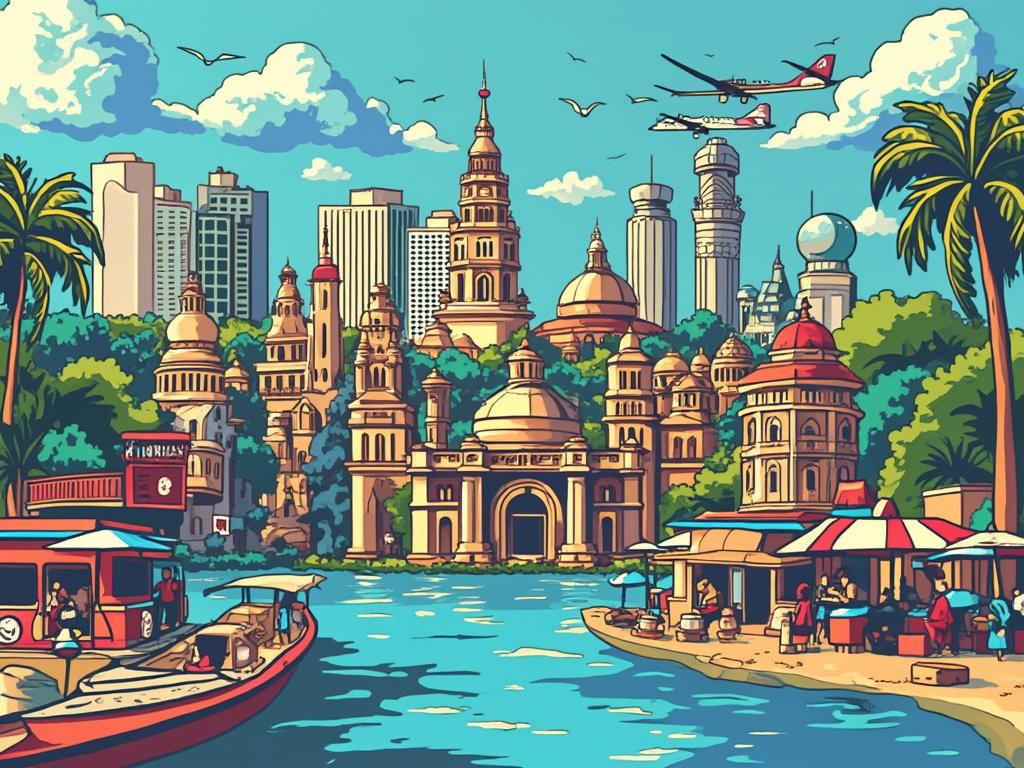

In [12]:
image = artist("Bangalore City")
display(image)

## Audio Output

In [ ]:
!ffmpeg -version
!ffprobe -version
!ffplay -version

In [22]:
from pydub import AudioSegment
from pydub.playback import play

def talker(message):
    response = openai.audio.speech.create(
        model="gpt-4o-mini-tts",
        voice="nova", # alloy or onyx
        input=message
    )

    audio_stream = BytesIO(response.content)
    audio = AudioSegment.from_file(audio_stream, format="mp3")
    play(audio)

In [23]:
talker("Well, hi there. How are you doing today?")

Input #0, wav, from '/var/folders/yq/wj00tv3164vbkhp8wcwps39c0000gn/T/tmp9_v3t2ru.wav':
  Duration: 00:00:02.62, bitrate: 384 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 1 channels, s16, 384 kb/s
